# **Image Processing**

### 1. Direct Pixel Exctration

In [44]:
# important libraries

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import cv2

In [45]:
# image path
img_path = '/content/Boxer_43.jpg'

# function for pixel extraction
def direct_pixel_extraction(image_path):
    # Load the image
    image = cv2.imread(image_path)
    # Convert image to RGB (OpenCV loads images in BGR by default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Get pixel values
    pixels = np.array(image_rgb)
    return pixels

# function call for pixcel extration
pixels = direct_pixel_extraction(img_path) # storing the pixel value
print(pixels)

[[[149 171  89]
  [150 172  90]
  [151 173  91]
  ...
  [141 160  79]
  [137 156  75]
  [135 157  74]]

 [[143 162  81]
  [143 165  83]
  [146 165  84]
  ...
  [136 155  74]
  [134 156  73]
  [134 156  73]]

 [[146 164  82]
  [147 166  84]
  [151 169  87]
  ...
  [134 156  74]
  [135 157  74]
  [134 158  74]]

 ...

 [[122 142  57]
  [149 169  84]
  [155 177  92]
  ...
  [116 150  73]
  [124 149  68]
  [135 154  73]]

 [[128 148  63]
  [149 169  84]
  [156 178  93]
  ...
  [103 134  58]
  [121 140  61]
  [144 158  79]]

 [[132 151  69]
  [141 160  78]
  [140 162  79]
  ...
  [115 139  65]
  [118 132  55]
  [154 162  85]]]


In [46]:
# reading an image
img_mpl = plt.imread('/content/Boxer_43.jpg')
img_cv2 = cv2.imread('/content/Boxer_43.jpg')

In [47]:
img_mpl.shape,img_cv2.shape

((111, 162, 3), (111, 162, 3))

In [48]:
# image Array represnt (H,W,C) formate.
# (height, wiedth, channels)
# channels are 3 .... RGB (read,green,blue)

In [49]:
# pixel value range in between 0 to 255
# max pixel value is 255 and min value is 0
# for normalise in bettween 0 to 1 we dived pixcel value from 255.

In [50]:
# convert 3d array to 1d flatten array
img_mpl.flatten()

array([149, 171,  89, ..., 154, 162,  85], dtype=uint8)

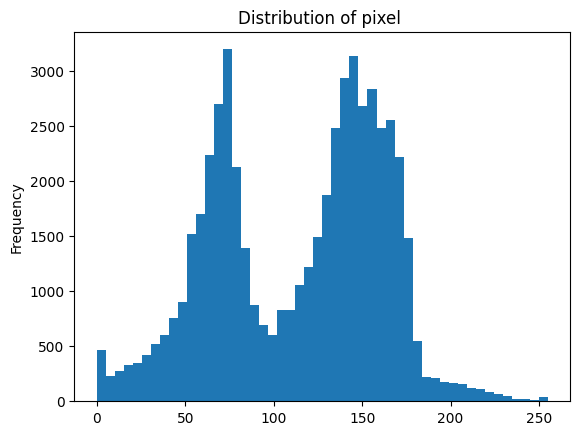

In [51]:
#Distribution of pixel values
pd.Series(img_mpl.flatten()).plot(kind='hist',bins=50,title='Distribution of pixel ')
plt.show()

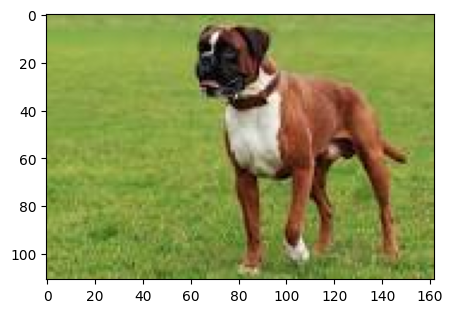

In [52]:
# Display image
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(img_mpl)
plt.show()

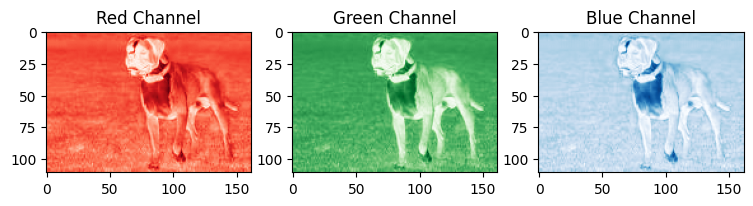

In [53]:
# Display RBG Channels for our image
fig, ax = plt.subplots(1,3,figsize=(9,3))
ax[0].imshow(img_mpl[:,:,0],cmap='Reds')
ax[1].imshow(img_mpl[:,:,1],cmap='Greens')
ax[2].imshow(img_mpl[:,:,2],cmap='Blues')
ax[0].set_title('Red Channel')
ax[1].set_title('Green Channel')
ax[2].set_title('Blue Channel')
plt.show()

In [54]:
# Matplotlib Vs CV2 Numpy array
# cv2 reads in channels as BGR
# Matplotlib reads in channels as RGB

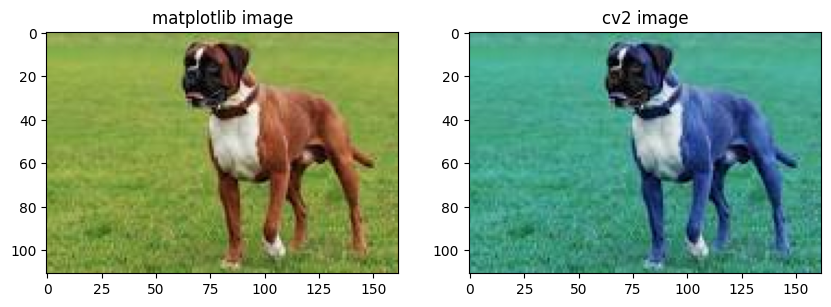

In [55]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(img_mpl)
ax[1].imshow(img_cv2)
ax[0].set_title('matplotlib image')
ax[1].set_title('cv2 image')
plt.show()

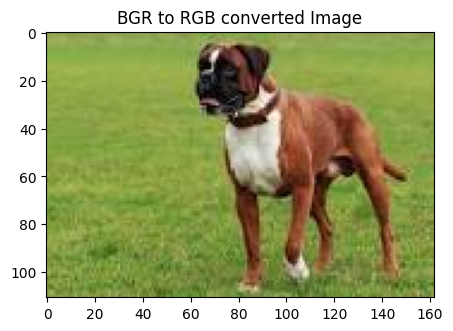

In [65]:
# coverting from BGR to RGB in cv2 image

img_cv2_rgb = cv2.cvtColor(img_cv2,cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(img_cv2_rgb)
ax.set_title('BGR to RGB converted Image')
plt.show()

Image Manipulation

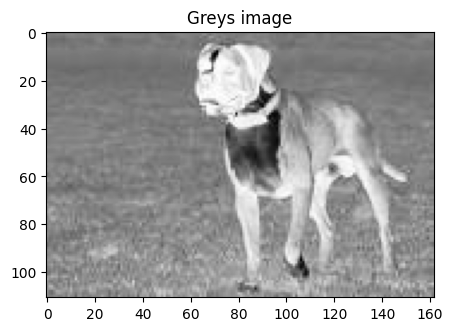

In [57]:
# Image manipulation
# convert gray color image
img_gray = cv2.cvtColor(img_cv2_rgb,cv2.COLOR_RGB2GRAY)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(img_gray,cmap='Greys')
ax.set_title('Greys image')
plt.show()

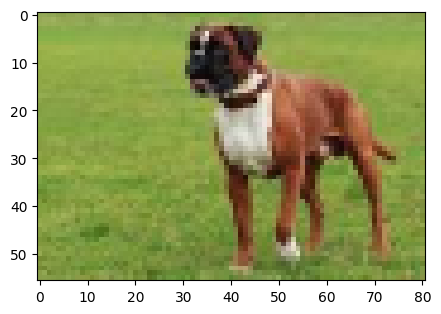

In [58]:
# Resizing and Scaling of image
img_resized = cv2.resize(img_cv2_rgb,None,fx=0.5,fy=0.5)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(img_resized)
plt.show()

In [59]:
# dimentions is changed after resizing image
img_resized.shape, img_cv2_rgb.shape

((56, 81, 3), (111, 162, 3))

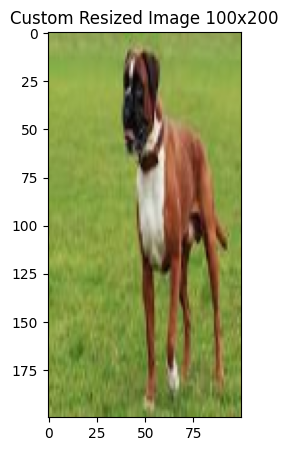

In [66]:
# different custom dimention size
img_resize = cv2.resize(img_cv2_rgb, (100,200))

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(img_resize)
ax.set_title('Custom Resized Image 100x200')
plt.show()

In [61]:
img_resize.shape, img_cv2_rgb.shape

((200, 100, 3), (111, 162, 3))

In [62]:
# CV2 kernels for image manipulation likes this
# Identity = [[0,0,0],[0,1,0],[0,0,0]]
# sharpen = [[0,-1,0],[-1,5,-1],[0,-1,0]]
# box blur = 1/9[[1,1,1],[1,1,1],[1,1,1]]
# Gaussion blur = 1/16[[1,2,1],[2,4,2],[1,2,1]]

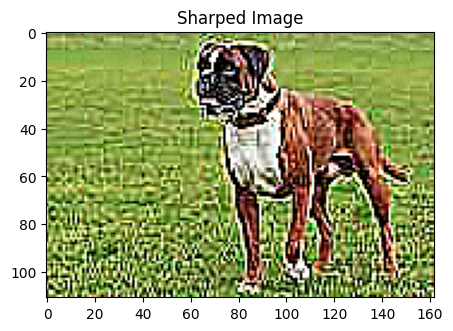

In [63]:
# sharpen image
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])

img_sharped = cv2.filter2D(img_cv2_rgb,-1,kernel_sharpening)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(img_sharped)
ax.set_title('Sharped Image')
plt.show()

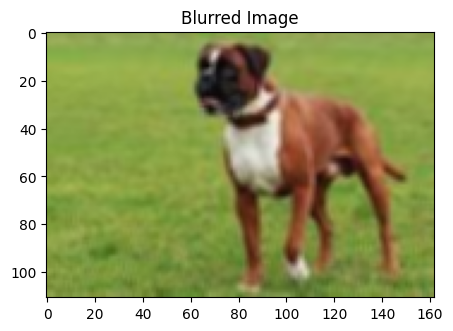

In [64]:
# Bluring the image
kernel_3x3 = np.ones((3,3),np.float32)/9   # 9 is changable according to blured image needed

img_blur = cv2.filter2D(img_cv2_rgb,-1,kernel_3x3)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(img_blur)
ax.set_title('Blurred Image')
plt.show()

### 2. Pre-Train Segmentation Model

In [80]:
# Use TensorFlow to load a pre-trained model

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

MODEL 1.  DeepLabV3 Segmentation Model

In [86]:
# DeepLabV3 Model


# Load the pre-trained DeepLabV3 model
def load_deeplabv3_model():
    model = tf.keras.applications.DenseNet201(weights='imagenet', include_top=False)
    return model

# Preprocess the input image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    input_image = cv2.resize(image_rgb, (224, 224))
    input_image = np.expand_dims(input_image, axis=0)
    input_image = tf.keras.applications.densenet.preprocess_input(input_image)
    return input_image, image_rgb

# Perform segmentation
def segment_image(model, input_image):
    predictions = model.predict(input_image)
    segmented_image = np.argmax(predictions, axis=-1)[0]
    return segmented_image


In [88]:
# Define the path to the input image
image_path = '/content/Boxer_43.jpg'

# Load the DeepLabV3 model
model = load_deeplabv3_model()

# Load and preprocess the image
input_image, original_image = preprocess_image(image_path)

# Perform segmentation
segmented_image = segment_image(model, input_image)


1/1 [==============================] - 4s 4s/step


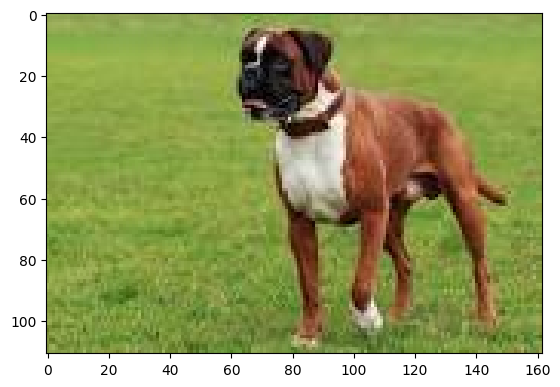

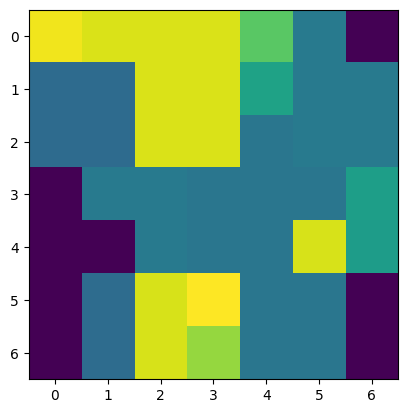

In [89]:
#  function for image visualization
def visualize_pixels(pixels):
    plt.imshow(pixels)
    plt.show()

#visualization function call
visualize_pixels(pixels)  # For direct extraction
visualize_pixels(segmented_image)  # For segmentation model

In [90]:
pixels.shape,segmented_image.shape

((111, 162, 3), (7, 7))

In [92]:
# Resize the segmented image to match the original image size
segmented_image_resized = cv2.resize(segmented_image,(original_image.shape[1], original_image.shape[0]),interpolation=cv2.INTER_NEAREST)

In [93]:
segmented_image_resized.shape

(111, 162)

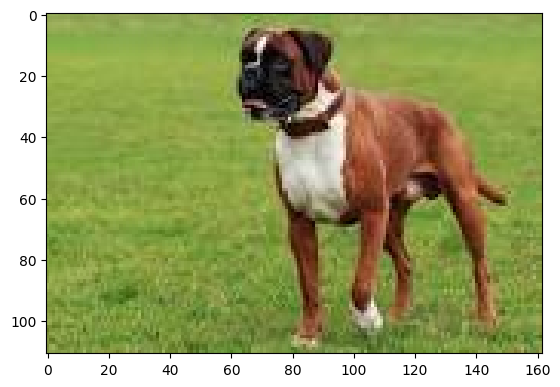

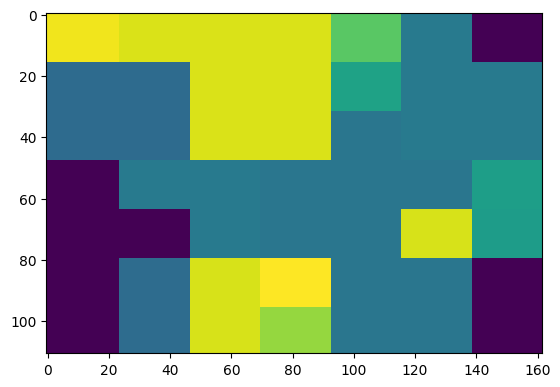

In [94]:
#visualization function call
visualize_pixels(pixels)  # For direct extraction
visualize_pixels(segmented_image_resized)  # For segmentation resized image

MODEL 2. U-Net Segmentation Model

In [79]:
# U-net model


# Define U-Net model architecture
def unet_model(input_size=(128, 128, 3)):
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # Decoder
    up6 = Conv2D(512, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv5))
    merge6 = Concatenate(axis=3)([conv4, up6])
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = Concatenate(axis=3)([conv3, up7])
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = Concatenate(axis=3)([conv2, up8])
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = Concatenate(axis=3)([conv1, up9])
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)
    conv9 = Conv2D(2, 3, activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs, conv10)
    return model

# Load and preprocess the image
def load_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, (128, 128))
    image_resized = np.expand_dims(image_resized, axis=0)
    return image_resized

# Perform segmentation
def segment_image(model, image):
    prediction = model.predict(image)
    segmented_image = (prediction[0, :, :, 0] > 0.5).astype(np.uint8)
    return segmented_image

# Dummy data for training (replace with your dataset)
def generate_dummy_data(num_samples=100, image_size=(128, 128)):
    images = np.random.rand(num_samples, *image_size, 3)
    masks = np.random.randint(0, 2, (num_samples, *image_size, 1))
    return images, masks

In [81]:
# Define the paths

model_weights_path = "unet_weights.h5"

# Load and compile the U-Net model
model = unet_model()
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (use your own dataset here)
images, masks = generate_dummy_data()
model.fit(images, masks, epochs=10, batch_size=8)

# Save the trained weights
model.save_weights(model_weights_path)


Epoch 1/10
13/13 [==============================] - 219s 16s/step - loss: 0.6932 - accuracy: 0.4989
Epoch 2/10
13/13 [==============================] - 217s 17s/step - loss: 0.6931 - accuracy: 0.5004
Epoch 3/10
13/13 [==============================] - 216s 17s/step - loss: 0.6931 - accuracy: 0.5004
Epoch 4/10
13/13 [==============================] - 212s 16s/step - loss: 0.6931 - accuracy: 0.5004
Epoch 5/10
13/13 [==============================] - 215s 16s/step - loss: 0.6931 - accuracy: 0.5004
Epoch 6/10
13/13 [==============================] - 215s 17s/step - loss: 0.6931 - accuracy: 0.5004
Epoch 7/10
13/13 [==============================] - 214s 16s/step - loss: 0.6931 - accuracy: 0.5004
Epoch 8/10
13/13 [==============================] - 213s 16s/step - loss: 0.6931 - accuracy: 0.5004
Epoch 9/10
13/13 [==============================] - 215s 16s/step - loss: 0.6931 - accuracy: 0.5004
Epoch 10/10
13/13 [==============================] - 213s 16s/step - loss: 0.6931 - accuracy: 0.5004

In [96]:
# image path
img_path = '/content/Boxer_43.jpg'

# Load the image
image = load_image(img_path)

# Perform segmentation
segmented_image = segment_image(model, image)

segmented_image

1/1 [==============================] - 0s 150ms/step


array([[ 103,  103,  103,  103],
       [ 103,  957, 1333, 1333],
       [ 103,  957, 1824,  103],
       [ 103,  103, 1333,  103]])

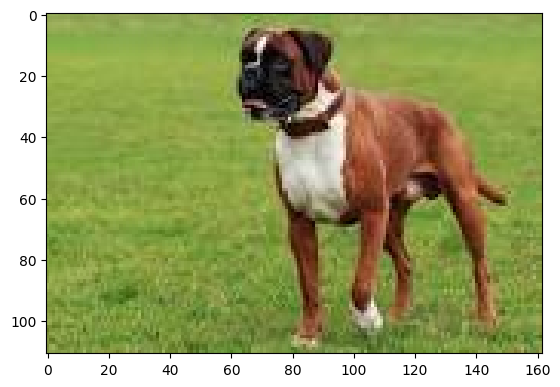

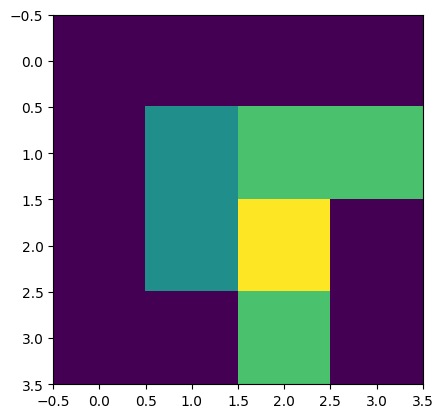

In [97]:
#visualization function call
visualize_pixels(pixels)  # For direct extraction
visualize_pixels(segmented_image)  # For segmentation model

In [98]:
pixels.shape,segmented_image.shape


((111, 162, 3), (4, 4))

In [101]:
# Save the segmented image
segmented_image_resized = cv2.resize(segmented_image, (image.shape[2], image.shape[1]),interpolation=cv2.INTER_NEAREST)
cv2.imwrite("output/segmented_image.png", segmented_image_resized * 255)


False

In [102]:
segmented_image_resized.shape

(128, 128)

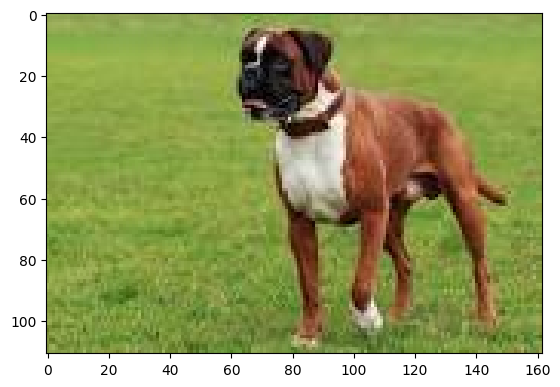

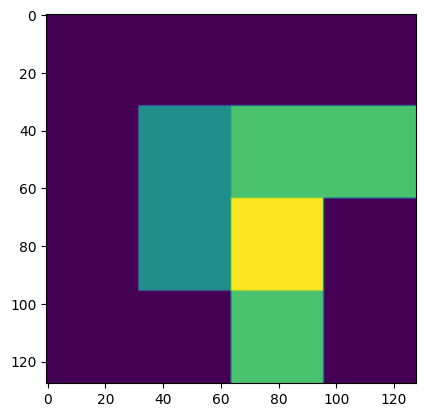

In [103]:
#visualization function call
visualize_pixels(pixels)  # For direct extraction
visualize_pixels(segmented_image_resized)  # For segmentation resized image